In [1]:

from numpy import loadtxt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from google.colab import drive
import tensorflow as tf
import matplotlib
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/Data Mining/covidcln1.csv')
df.head()

,Unnamed: 0,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,5,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
3,9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,USMER,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189583,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
189584,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
189585,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
189586,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


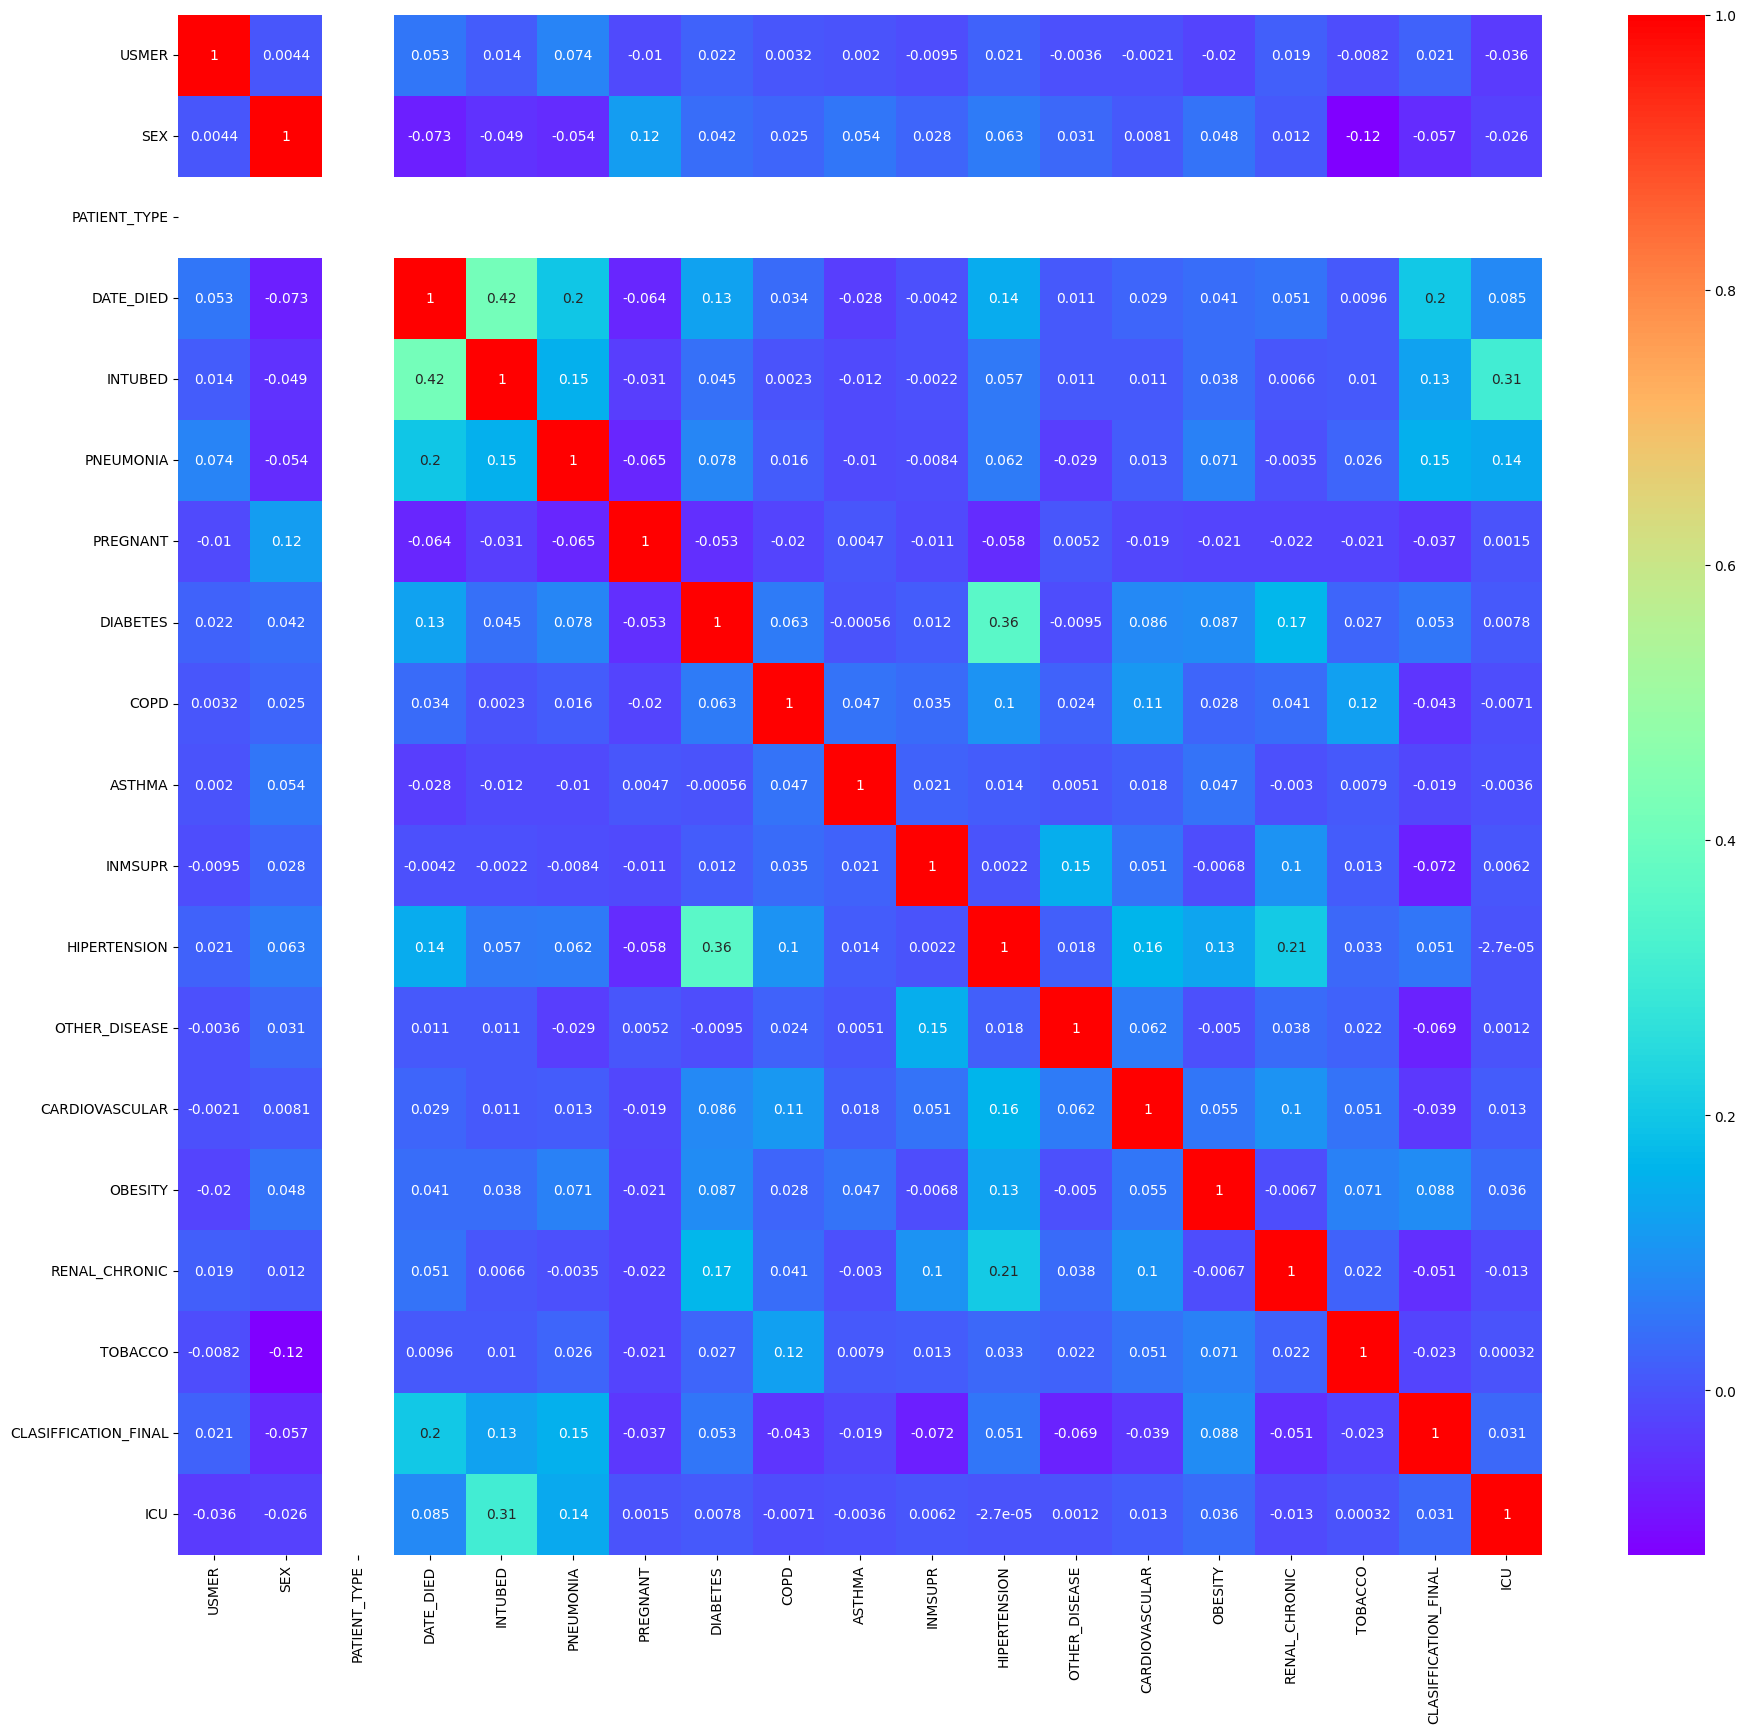

In [4]:
plt.figure(figsize=(22,20))
korelasi = df.corr()
sns.heatmap(korelasi, annot = True, cmap = plt.cm.rainbow)
plt.show()

In [5]:
x = df.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values
y = df.iloc[:, -1].values
print(x)
print(y)


[[0 0 1 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 [0 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]]
[0 0 0 ... 0 0 0]


In [6]:
#Membagi Dataset ke Data Training dan Data Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [7]:
print(x_train)

[[1 0 1 ... 0 1 0]
 [1 1 1 ... 1 1 0]
 [1 0 1 ... 0 1 0]
 ...
 [1 0 1 ... 0 0 1]
 [1 0 1 ... 1 0 0]
 [1 1 1 ... 0 1 0]]


In [8]:
len(x_train)

132711

In [9]:
len(x)

189588

In [10]:
len(x_test)

56877

In [11]:

print(y_train)


[0 0 0 ... 1 0 0]


In [12]:
len(y_train)


132711

In [13]:
len(y_test)

56877

In [14]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
print(x_train)

[[ 0.91334015 -0.8285683   0.         ... -0.30177523  0.8646653
  -0.30728557]
 [ 0.91334015  1.2069011   0.         ...  3.31372464  0.8646653
  -0.30728557]
 [ 0.91334015 -0.8285683   0.         ... -0.30177523  0.8646653
  -0.30728557]
 ...
 [ 0.91334015 -0.8285683   0.         ... -0.30177523 -1.15651687
   3.25430182]
 [ 0.91334015 -0.8285683   0.         ...  3.31372464 -1.15651687
  -0.30728557]
 [ 0.91334015  1.2069011   0.         ... -0.30177523  0.8646653
  -0.30728557]]


In [16]:
print(x_test)

[[-1.09488234 -0.8285683   0.         ... -0.30177523 -1.15651687
  -0.30728557]
 [-1.09488234  1.2069011   0.         ... -0.30177523  0.8646653
  -0.30728557]
 [ 0.91334015 -0.8285683   0.         ... -0.30177523 -1.15651687
  -0.30728557]
 ...
 [-1.09488234  1.2069011   0.         ... -0.30177523 -1.15651687
  -0.30728557]
 [-1.09488234  1.2069011   0.         ... -0.30177523  0.8646653
   3.25430182]
 [ 0.91334015 -0.8285683   0.         ... -0.30177523  0.8646653
  -0.30728557]]


In [17]:
#Memanggil Function KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [18]:
#Menentukan Prediksi
y_pred = classifier.predict(x_test)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Data dan target
data = x
target = y

# Inisialisasi model
model = KNeighborsClassifier()

# Melakukan k-fold cross-validation dari k=1 hingga k=20
for k in range(2, 21):
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(model, data, target, cv=kfold)
    avg_score = np.mean(scores)
    print(f"K = {k}, Rata-rata Skor = {avg_score}")

K = 2, Rata-rata Skor = 0.9974629195940672
K = 3, Rata-rata Skor = 0.9980747726649367
K = 4, Rata-rata Skor = 0.9980273013059898
K = 5, Rata-rata Skor = 0.9980694988203563
K = 6, Rata-rata Skor = 0.998159166191953
K = 7, Rata-rata Skor = 0.9981697153828302
K = 8, Rata-rata Skor = 0.998174990422598
K = 9, Rata-rata Skor = 0.9981011451404017
K = 10, Rata-rata Skor = 0.998222462838825
K = 11, Rata-rata Skor = 0.9982804785474162
K = 12, Rata-rata Skor = 0.9982910310779163
K = 13, Rata-rata Skor = 0.9981116988653184
K = 14, Rata-rata Skor = 0.9983701500094941
K = 15, Rata-rata Skor = 0.9982277362647195
K = 16, Rata-rata Skor = 0.9983859700101096
K = 17, Rata-rata Skor = 0.9982804801318894
K = 18, Rata-rata Skor = 0.9981749931463479
K = 19, Rata-rata Skor = 0.9982910282643547
K = 20, Rata-rata Skor = 0.9983490526248783


In [20]:
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)

    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

Text(0, 0.5, 'Error Rate')

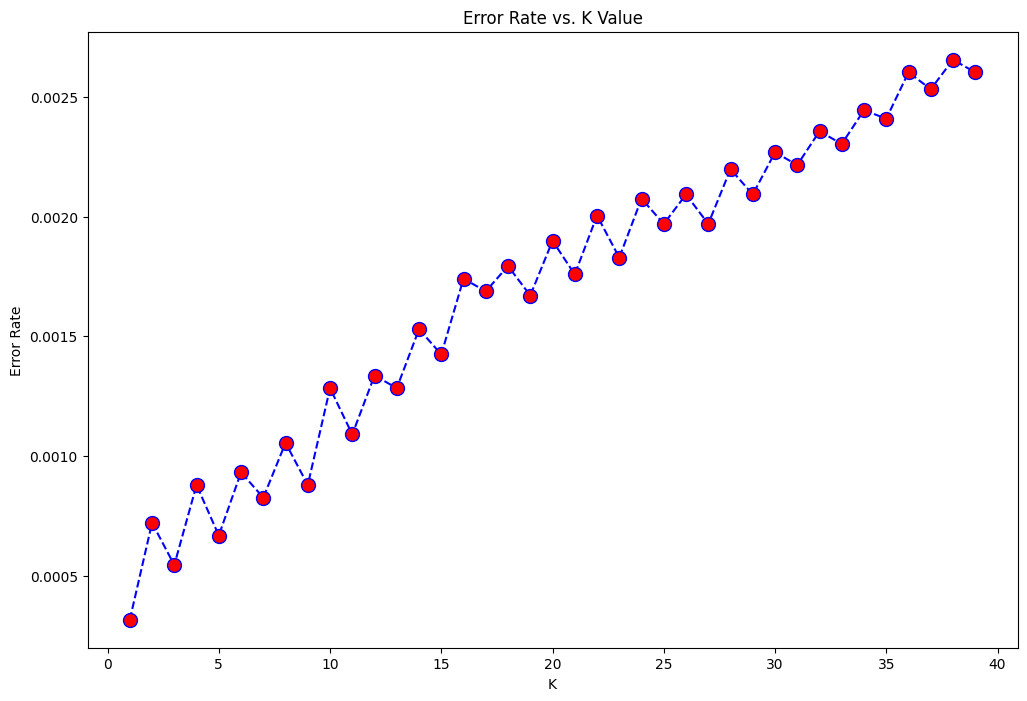

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [24]:
#Evaluasi dan Validasi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51893     0]
 [   38  4946]]


In [25]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51893
           1       1.00      0.99      1.00      4984

    accuracy                           1.00     56877
   macro avg       1.00      1.00      1.00     56877
weighted avg       1.00      1.00      1.00     56877



In [26]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :99 persen


Akurasi Prediksi: 99.93%


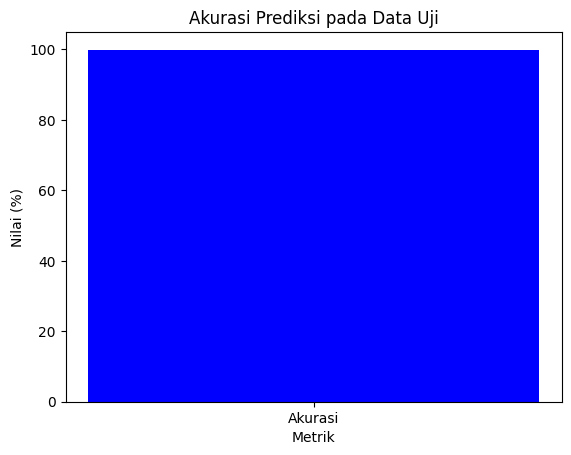

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Mengukur akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)

print(f'Akurasi Prediksi: {accuracy * 100:.2f}%')

# Menyiapkan grafik akurasi
plt.bar(['Akurasi'], [accuracy * 100], color=['blue'])

# Menambahkan label dan judul
plt.xlabel('Metrik')
plt.ylabel('Nilai (%)')
plt.title('Akurasi Prediksi pada Data Uji')

# Menampilkan grafik
plt.show()